# 人工知能とソフトコンピューティング 第2回 回帰分析（最小二乗法）演習
## 回帰分析の処理

### ステップ1
必要なモジュールをインポートする

In [7]:
from pathlib import Path # ファイルパスの取り扱い
import pandas as pd # データの取り扱い（CSVからの読み込みに利用）
from pandas import Series, DataFrame
import numpy as np # 数値計算
import matplotlib.pyplot as plt # グラフ描画
from sklearn.preprocessing import StandardScaler # データの正規化
from sklearn.linear_model import LinearRegression # 線形回帰
from sklearn.preprocessing import PolynomialFeatures # 多項式の特徴量の取り扱い
from sklearn.metrics import root_mean_squared_error # 平方根平均二乗誤差
from sklearn.pipeline import Pipeline # パイプラインオブジェクト

### ステップ2
pandasの機能を使ってファイル（WebClassからダウンロードした trainX.csv, testX.csv）から訓練用のデータを読み込む（Xには数字が入る）
* pd.read_csv() の引数には trainX.csv のパス名を記載する（この例では，プログラムと同じフォルダの下にファイルがあることを前提としている）
* train1.csv, test1.csv には 10件のデータ，train2.csv, test2.csv には 100件のデータが含まれる

In [8]:
train = pd.read_csv(Path("02_data", "train1.csv"))
train # CSVから読み込んだデータの確認

,x,t
0,0.000000,0.138797
1,0.111111,0.463289
2,0.222222,0.998507
3,0.333333,0.743801
4,0.444444,0.253805
5,0.555556,-0.002409
6,0.666667,-0.958157
7,0.777778,-1.021495
8,0.888889,-0.806497
9,1.000000,0.431481


### ステップ3
同様にテスト用のデータ（testX.csv）を読み込む

In [9]:
test = pd.read_csv(Path("02_data", "test1.csv"))
test

,x,t
0,0.000000,0.257348
1,0.111111,0.690971
2,0.222222,0.915159
3,0.333333,0.950445
4,0.444444,0.706691
5,0.555556,-0.495353
6,0.666667,-0.977294
7,0.777778,-1.040249
8,0.888889,-0.428648
9,1.000000,-0.040142


### ステップ4
CSVから読み込んだ訓練データとテストデータから x, t のリストを取り出す  
回帰ライブラリのインタフェースに合わせるために train_X は2次元リスト，train_t は1次元リスト

In [10]:
train_X = train[["x"]] # CSVから読み込んだ訓練データのうちxの値リスト
train_t = train["t"] # CSVから読み込んだ訓練データのうちtの値リスト
test_X = test[["x"]] # CSVから読み込んだテストデータのうちxの値リスト
test_t = test["t"] # CSVから読み込んだテストデータのうちtの値リスト

### ステップ5
matplotlib を使って訓練データに含まれる値の散布図を作り，大まかな傾向をつかむ

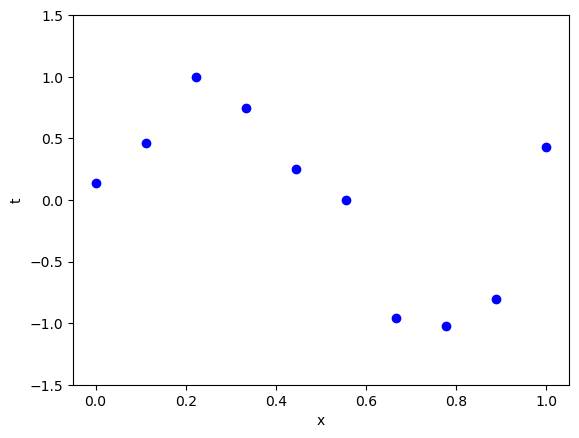

In [11]:
fig = plt.figure() # figure オブジェクト取得
subplot = fig.add_subplot() # 描画面（subplot）を加える
subplot.set_xlabel("x") # X軸のラベル設定
subplot.set_ylabel("t") # Y軸のラベル設定
subplot.set_xlim(-0.05, 1.05) # X軸の範囲を設定（-0.05～1.05）
#subplot.set_xlim(0, 50) # 課題用
subplot.set_ylim(-1.5, 1.5) # Y軸の範囲を設定（-1.5～1.5）
#subplot.set_ylim(0, 50) # 課題用
subplot.scatter(train_X, train_t, marker="o", color="blue") # 描画面に訓練データの散布図を描画
#subplot.scatter(test_X, test_t, marker="o", color="green") # テストデータの散布図を見たい場合はこの先頭の # を削除
plt.show() # 画面表示

### ステップ6
変数 m で与えられた次元について scikit-learn の線形回帰ライブラリを用いて訓練データを学習させる
* 説明変数はx，目的変数はt（xの値からtの値を予測するモデルを作る）
* m次多項式に近似する t = a_0 + a_1 * x ** 1 + a_2 * x ** 2 + ... + a_m * x ** m

In [12]:
m = 0 # フィットさせる多項式の次数
poly = PolynomialFeatures(degree = m) # 多項式回帰用の特徴量変換器
poly_X_train = poly.fit_transform(train_X) # 多項式用の特徴量に変換（行列 Φ を用意）
model = LinearRegression() # 線形回帰モデル
_ = model.fit(poly_X_train, train_t) # 多項式にフィット

### ステップ7
ここまでで訓練データから予測モデル（model）が作成できた  
予測モデルと訓練データを描画
* 予測モデル（model）の intercept_ 属性は多項式の切片
* 予測モデル（model）の coef_ 属性は多項式の係数（リスト）
* t = model.intercept_ + model.coef_[1] * x ** 1 + model.coef_[2] * x ** 2 + ... + model.coef_[m] * x ** m
* 予測モデル（model）の predict() メソッドを，引数xを与えて起動することで t を予測

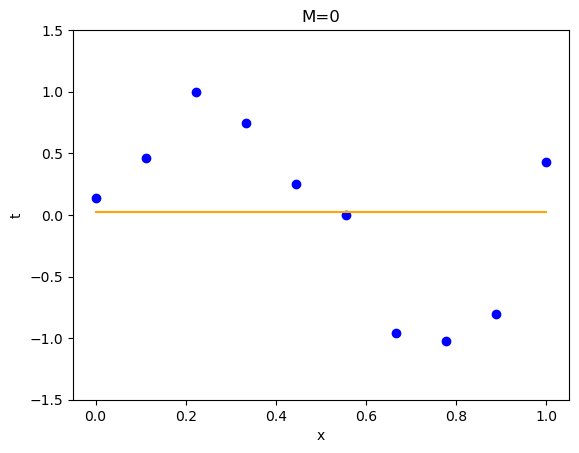

In [13]:
# 学習結果の多項式を描画
x = DataFrame(np.linspace(0, 1, 100), columns = ["x"]) # x = 0～1 に100個の点を作成
#x = DataFrame(np.linspace(0, 50, 100), columns = ["x"]) # 課題用
t = model.predict(poly.fit_transform(x)) # 学習済みのモデルを用いて生成したx から t を予測
# x, t を線として描画 => 学習結果の多項式
fig, subplot = plt.subplots()
subplot.set_title("M={}".format(m))
subplot.set_xlabel("x")
subplot.set_ylabel("t")
subplot.set_xlim(-0.05, 1.05)
#subplot.set_xlim(0, 50) # 課題用
subplot.set_ylim(-1.5, 1.5)
#subplot.set_ylim(0, 50) # 課題用
subplot.plot(x, t, color = "orange")
# 訓練データの散布図を描画
subplot.scatter(train_X, train_t, marker = "o", color = "blue")
plt.show()

回帰分析の処理はここまで．  
多項式の次数（ステップ6のセルで定義している変数mの値）をいろいろ変化させ，多項式がどのように変わるか調べてみる．

## 推測した多項式の評価

### ステップ8
平方根平均二乗誤差（RMSE）を計算する  
scikit-learn の mean_square_error を利用
* 訓練データ（train_X）に対して t の予測値を求めて RMSE を計算
* テストデータ（test_X）に対して t の予測値を求めて RMSE を計算

In [14]:
# 訓練データ（train_X）についてモデルを用いて予測（pred_train_t）
pred_train_t = model.predict(poly.fit_transform(train_X))
# 訓練データ（train_t）と予測結果（pred_train_t）の間の平方根平均二乗誤差を計算
rmse_train = root_mean_squared_error(train_t, pred_train_t)
# テストデータ（test_X）についてモデルを用いて予測（pred_test_t）
pred_test_t = model.predict(poly.fit_transform(test_X))
# テストデータ（test_t）と予測結果（pred_test_t）の間の平方根平均二乗誤差を計算
rmse_test = root_mean_squared_error(test_t, pred_test_t)
print("RMSE(Training) = ", rmse_train)
print("RMSE(Test) =", rmse_test)

RMSE(Training) =  0.681241406507787
RMSE(Test) = 0.7233059379866335


多項式の次数（mの値）を変化させ，訓練データに対するRMSEとテストデータに対するRMSEがどのように変わるか調べる．

## 過学習の検出と適切な次数の決定

### ステップ9
過学習（オーバフィッティング）の検出
* 多項式の次数を 0次元から9次元まで変化させ，訓練データに対する RMSE と テストデータに対する RMSE を求める
* その変化の様子を描画

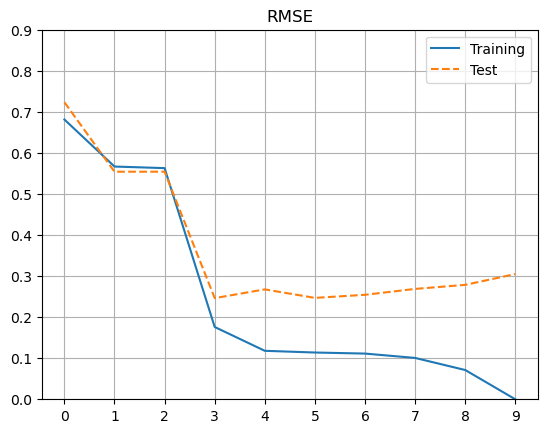

In [15]:
rmses = {"Training": [], "Test": []}
for n in range(0, 10): # 0から9まで繰り返し
    poly = PolynomialFeatures(degree = n)
    poly_X_train = poly.fit_transform(train_X)
    model = LinearRegression()
    model.fit(poly_X_train, train_t) # 訓練データによる学習
    pred_train_t = model.predict(poly.fit_transform(train_X)) # 訓練データについて予測
    pred_test_t = model.predict(poly.fit_transform(test_X)) # テストデータについて予測
    rmses["Training"].append(root_mean_squared_error(train_t, pred_train_t)) # 訓練データの平方根平均二乗誤差を計算
    rmses["Test"].append(root_mean_squared_error(test_t, pred_test_t)) # テストデータの平方根平均二乗誤差を計算
rmse_data = DataFrame(rmses) # 0次元から9次元までの誤差をデータフレーム形式にする
# データフレームの値を描画
subplot = rmse_data.plot(grid=True, style=['-', '--'], xticks=range(0, 10), ylim=(0, 0.9))
#subplot = rmse_data.plot(grid=True, style=['-', '--'], xticks=range(0, 10)) # 課題用
subplot.set_title("RMSE")
subplot.legend() # 凡例の出力
plt.show()

訓練データ（Training）に対するRMSEとテストデータ（Test）に対するRMSEの様子を見ると  
次数が高くなるにつれ，Training は徐々に小さくなるが，Test は下がらなくなる．  
様々なテストデータで試行し，それ以上評価値が下がらなくなる次元を適切と判断
* 読み込むデータを train2.csv, test2.csv （あるいはtrain1,csv, test1.csv との組み合わせ）に変更して試行錯誤してみる

## パイプラインの利用
前段の処理を後段が受け継いでひとまとめの処理を行う場合  
scikit-learn では Pipeline オブジェクトを用いる  
深層学習でも同様の処理構成がよく用いられる（ライブラリによって取りまとめるためのオブジェクトは異なる）

### ステップ10
Pipeline オブジェクトを使って PolynomialFeatures と LinearRegression をまとめたモデルを作る  
データはここまでで読み込んだものと同じものを使う

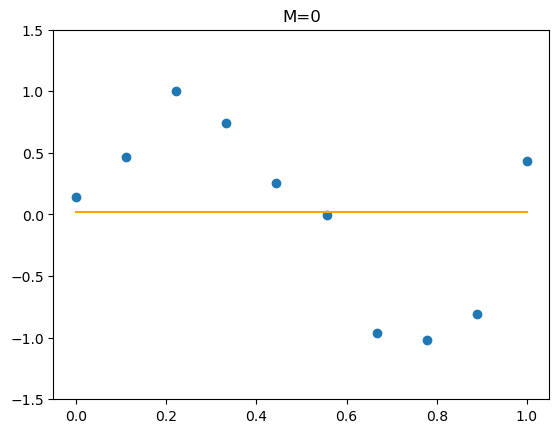

In [16]:
#m = 3 # 次数 (ステップ6で設定したものと同じものを使う場合はこの文はコメントアウトしてよい
# PolynomialFeatures と LinearRegression からなるパイプラインを作る
model = Pipeline([
    ("poly", PolynomialFeatures(degree=m)),
    ("linear", LinearRegression())
])
# パイプラインに訓練データを与えて学習
model.fit(train_X, train_t)

# パイプラインにデータを与えて予測
x = DataFrame(np.linspace(0, 1, 100), columns = ["x"])
#x = DataFrame(np.linspace(0, 50, 100), columns = ["x"]) # 課題用
t = model.predict(x)

# 結果の描画
fig, subplot = plt.subplots()
subplot.set_title("M={}".format(m))
subplot.scatter(train_X, train_t)
subplot.set_xlim(-0.05, 1.05)
#subplot.set_xlim(0, 50) # 課題用
subplot.set_ylim(-1.5, 1.5)
#subplot.set_ylim(0, 50) # 課題用
subplot.plot(x, t, color = "orange")
plt.show()